In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
charging_station = pd.read_csv("electric_vehicle_charging_station_list.csv")

In [3]:
#print 1st five rows
charging_station.head()

,no,region,address,aux addres,latitude,longitude,type,power,service
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service


In [4]:
#print the shape of the dataset
charging_station.shape

(202, 9)

In [5]:
#display basic information about the dataset
charging_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no          202 non-null    int64  
 1   region      202 non-null    object 
 2   address     202 non-null    object 
 3   aux addres  202 non-null    object 
 4   latitude    202 non-null    float64
 5   longitude   202 non-null    float64
 6   type        202 non-null    object 
 7   power       202 non-null    object 
 8   service     202 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 14.3+ KB


In [6]:
#checking null values
charging_station.isnull().sum()

no            0
region        0
address       0
aux addres    0
latitude      0
longitude     0
type          0
power         0
service       0
dtype: int64

In [7]:
#checking duplicate values
charging_station.duplicated().sum()

0

In [8]:
#display summary statistics
charging_station.describe()

,no,latitude,longitude
count,202.000000,202.000000,202.000000
mean,101.500000,25.960987,78.418002
std,58.456537,5.616108,3.097664
min,1.000000,8.481051,76.277781
25%,51.250000,28.535516,77.212996
50%,101.500000,28.580286,77.226252
75%,151.750000,28.617783,77.375216
max,202.000000,28.642892,88.509064


In [9]:
#checking columns
charging_station.columns

Index(['no', 'region', 'address', 'aux addres', 'latitude', 'longitude',
       'type', 'power', 'service'],
      dtype='object')

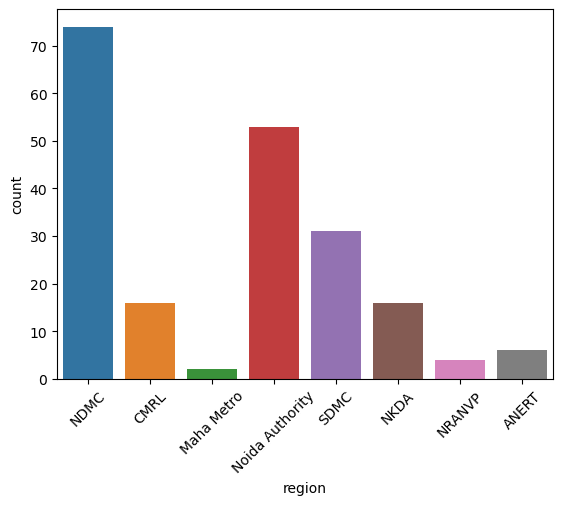

In [10]:
#count of charging stations in each region
sns.countplot(x = "region", data = charging_station)
plt.xticks(rotation = 45)
plt.show()

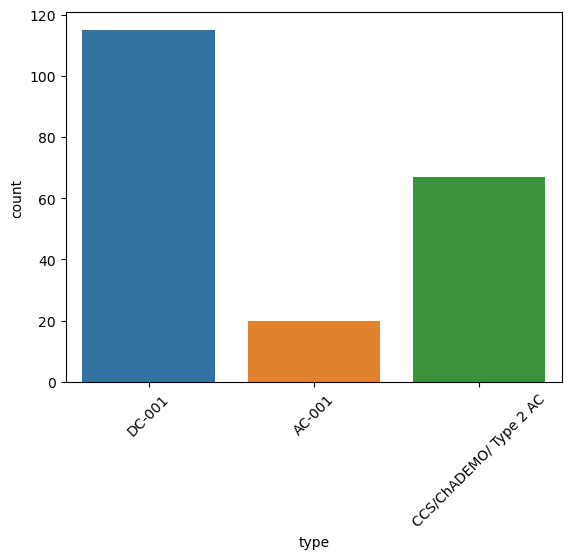

In [11]:
#distribution of charging station types
sns.countplot(x = "type", data = charging_station)
plt.xticks(rotation = 45)
plt.show()

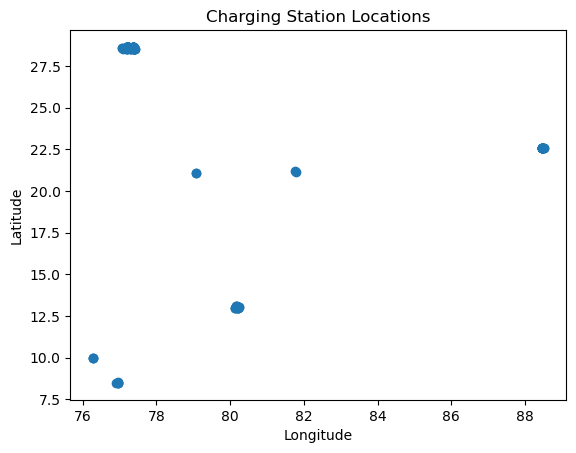

In [12]:
#relationship between latitude and longitude
plt.scatter(charging_station["longitude"], charging_station["latitude"])
plt.title("Charging Station Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [13]:
charging_station["service"].value_counts()

Self Service    202
Name: service, dtype: int64

In [14]:
charging_station["power"].value_counts()

15 kW              115
142kW               67
10(3.3 kW each)     20
Name: power, dtype: int64

In [15]:
#extract city information from the address
charging_station["city"] = charging_station["address"].apply(lambda x: x.split(',')[-1].strip())

In [16]:
#convert 'power' column to numerical values
charging_station["power_kw"] = charging_station["power"].apply(lambda x: int(x.split()[0]) if ('kW' in x.split() and x.split()[0].isdigit()) else 0)

In [17]:
#one-hot encoding
#charging_station = pd.get_dummies(charging_station, columns = ["region"], drop_first=True)

In [18]:
charging_station.head()

,no,region,address,aux addres,latitude,longitude,type,power,service,city,power_kw
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service,New Delhi- 110003,15
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service,New Delhi- 110003,15
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service,New Delhi- 110003,15
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service,New Delhi- 110003,15
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service,New Delhi- 110003,15


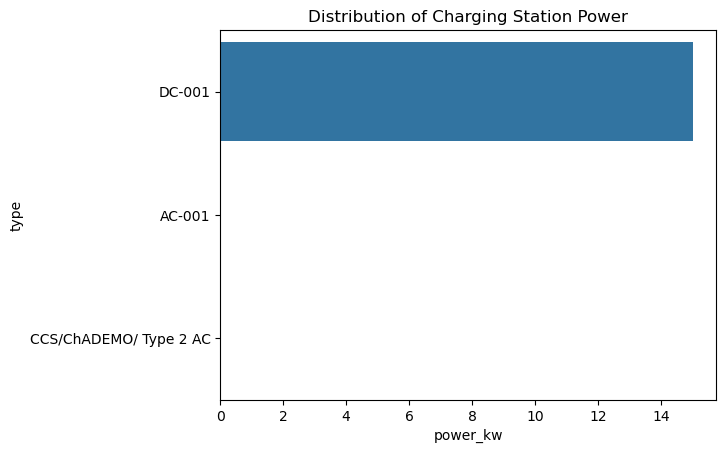

In [19]:
#bar plot of power distribution
sns.barplot(x = "power_kw", y = "type", data = charging_station)
plt.title("Distribution of Charging Station Power")
plt.show()

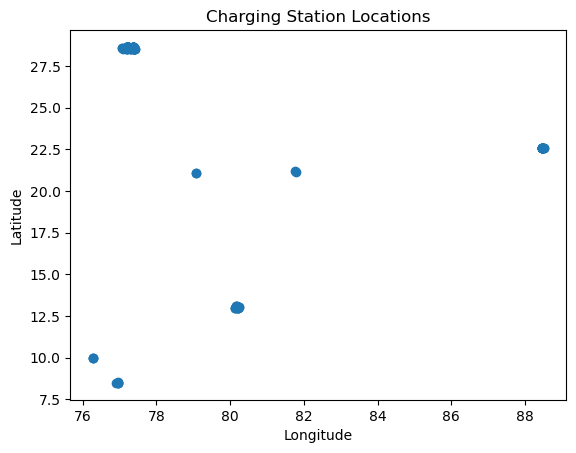

In [20]:
#map of charging stations using latitude and longitude
plt.scatter(charging_station["longitude"], charging_station["latitude"])
plt.title("Charging Station Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [21]:
#select relevant features for segmentation
features = ["latitude", "longitude", "power_kw"]    #"region_CMRL", "region_Maha Metro", "region_NDMC", "region_NKDA", "region_NRANVP", "region_Noida Authority", "region_SDMC"

#extract the selected features
X = charging_station[features]

In [22]:
#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
#Elbow method to find the optimal number of clusters (K)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

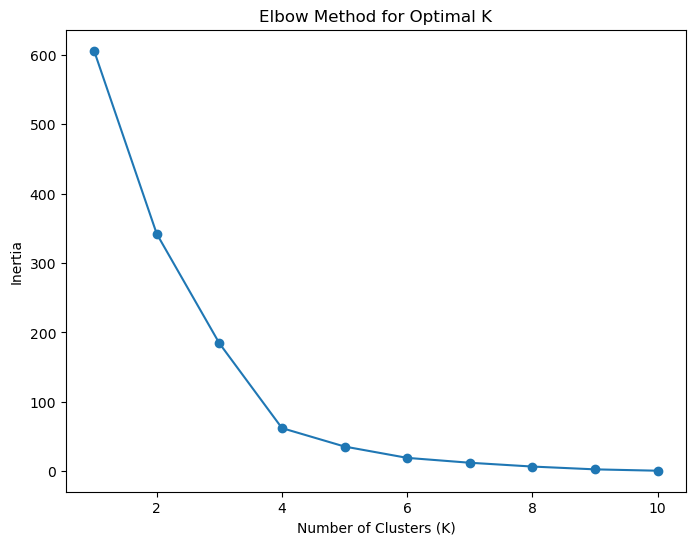

In [24]:
#plotting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker = "o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

In [25]:
optimal_k = 4

#K-Means clustering
kmeans = KMeans(n_clusters = optimal_k, random_state = 42)
charging_station["Segment"] = kmeans.fit_predict(X_scaled)

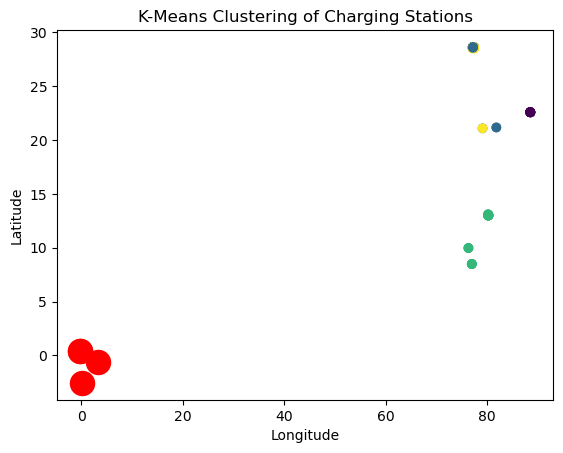

In [26]:
#Visualize clusters in 2D space
plt.scatter(charging_station["longitude"], charging_station["latitude"], c = charging_station["Segment"], cmap = "viridis")
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s = 300, c = "red")  #plot cluster centers
plt.title("K-Means Clustering of Charging Stations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [27]:
#training the K-Means Clustering Model
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)

#return a label for each data point based on their cluster
y = kmeans.fit_predict(X_scaled)

In [28]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 3 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 4 2 4 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3 3 1 1 1 1 3 3 1 1 3 3 1 1 1 1
 1 1 1 2 2 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1
 2 2 3 3 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3
 3 3 4 4 2 2 1 1 0 0 0 0 4 2 2 2 1]


In [29]:
#append the cluster labels to the charging station data
charging_station["Cluster"] = y

#print the cluster assignments for each charging station
print(charging_station[["latitude", "longitude", "region"]])

      latitude  longitude region
0    28.600725  77.226252   NDMC
1    28.600725  77.226252   NDMC
2    28.588303  77.217697   NDMC
3    28.582654  77.220087   NDMC
4    28.584485  77.220316   NDMC
..         ...        ...    ...
197   8.491622  76.956247  ANERT
198   8.481051  76.912622  ANERT
199   9.976921  76.277781  ANERT
200   8.491622  76.956247  ANERT
201  28.557662  77.157684   SDMC

[202 rows x 3 columns]


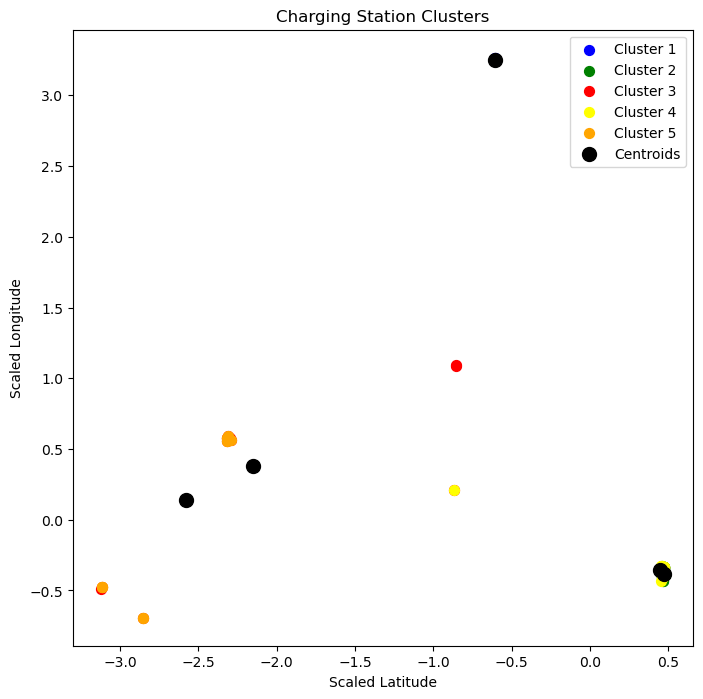

In [30]:
plt.figure(figsize=(8, 8))
plt.scatter(X_scaled[y == 0, 0], X_scaled[y == 0, 1], s=50, c="blue", label="Cluster 1")
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], s=50, c="green", label="Cluster 2")
plt.scatter(X_scaled[y == 2, 0], X_scaled[y == 2, 1], s=50, c="red", label="Cluster 3")
plt.scatter(X_scaled[y == 3, 0], X_scaled[y == 3, 1], s=50, c="yellow", label="Cluster 4")
plt.scatter(X_scaled[y == 4, 0], X_scaled[y == 4, 1], s=50, c="orange", label="Cluster 5")

# Plotting the Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c="black", label = "Centroids")

plt.title("Charging Station Clusters")
plt.xlabel("Scaled Latitude")
plt.ylabel("Scaled Longitude")
plt.legend(loc = "upper right")
plt.show()

In [31]:
#explore the characteristics of each segment
segment_summary = charging_station.groupby("Segment").mean()
segment_summary

,no,latitude,longitude,power_kw,Cluster
Segment,,,,,
0,107.750000,22.582627,88.468056,7.500,0.000000
1,63.687500,28.366449,77.350486,15.000,1.031250
2,138.333333,11.699372,79.029046,6.875,3.083333
3,141.590909,28.467171,77.312179,0.000,3.000000
